<a href="https://colab.research.google.com/github/andydarmawan1/Activity-Lifecycle-dan-Layout/blob/master/session%2019-20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimasi Nilai π dengan Monte Carlo Simulation

Estimasi nilai π: 3.13896


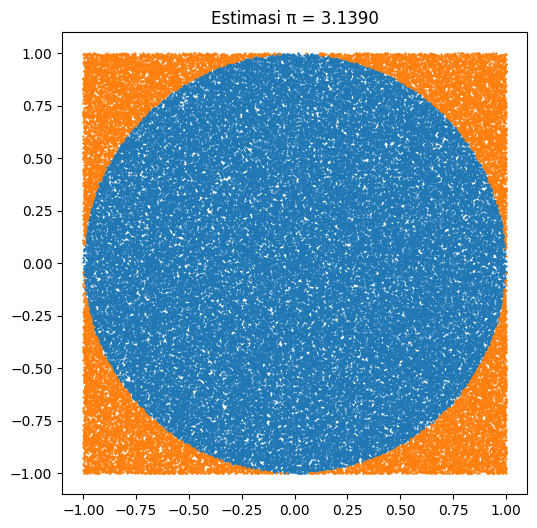

In [ ]:

import numpy as np
import matplotlib.pyplot as plt # menampilkan visualisasi

# Simulasi
n_points = 100000 # jumlah titik
x = np.random.uniform(-1, 1, n_points)
y = np.random.uniform(-1, 1, n_points)

# Titik dalam lingkaran
inside = x**2 + y**2 <= 1  #mengecek apakah titik (x,y) berada didalam lingkaran berjari-jari. (X pangkat 2 + Y pangkat 2 = 1)
pi_estimate = 4 * np.sum(inside) / n_points #Rasio titik didalam lingkuran / menghitung estimasi phi

print("Estimasi nilai π:", pi_estimate)

# Visualisasi
plt.figure(figsize=(6,6))
plt.scatter(x[inside], y[inside], s=0.5, label='Inside Circle') #biru
plt.scatter(x[~inside], y[~inside], s=0.5, label='Outside Circle') #orange
plt.title(f"Estimasi π = {pi_estimate:.4f}")
plt.legend() #Memberikan keterangan warna gambar
plt.show() # Menampilkan gambarnya


# Rounding Error & Floating Point

In [ ]:
import numpy as np

# Perhitungan biasa
a = 123.456
b = 123.455
hasil1 = a - b

# Perhitungan dengan pembulatan float
a_float = np.float32(a)
b_float = np.float32(b)
hasil2 = a_float - b_float

print("Hasil tanpa pembulatan:", hasil1)
print("Hasil dengan float32:", hasil2)


Hasil tanpa pembulatan: 0.0010000000000047748
Hasil dengan float32: 0.0009994507


# Newton's Method untuk Akar Kuadrat

In [ ]:
def newton_sqrt(x, max_iter=10, tol=1e-10): #1e = 0.0000000001
    guess = x / 2.0  #misal x = 25, tebakan awalnya = 25 / 2 = 12.5
    for i in range(max_iter):
        prev = guess
        guess = (guess + x / guess) / 2.0. #(tebakan_lama + (x / tebakan_lama)) /2
        if abs(prev - guess) < tol: #mengecek akurasi 5.0000000001 #5.0000000000
            break
    return guess

x = 25
hasil = newton_sqrt(x)
print(f"Akar kuadrat dari {x} adalah: {hasil}")

Akar kuadrat dari 25 adalah: 5.0


# CASE 1: Gaussian Mixture Model dengan Algoritma EM

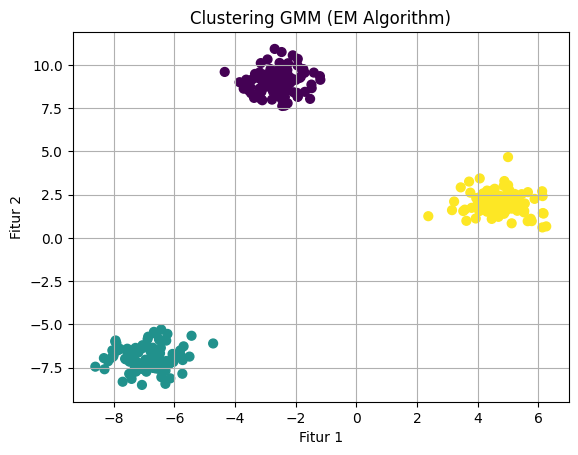

In [1]:
# Import library yang diperlukan
import numpy as np  # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
from sklearn.mixture import GaussianMixture  # Algoritma GMM dari scikit-learn
from sklearn.datasets import make_blobs  # Untuk membuat data sintetis

# Membuat data sintetis untuk clustering
# - n_samples=300: membuat 300 titik data
# - centers=3: data akan memiliki 3 cluster alami
# - cluster_std=0.70: standar deviasi/penyebaran tiap cluster
# - random_state=42: seed untuk reproduktibilitas hasil
x, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.70, random_state=42)

# Membuat dan melatih model Gaussian Mixture Model (GMM)
# - n_components=3: jumlah komponen/cluster yang diharapkan (sama dengan centers di atas)
# - random_state=0: seed untuk reproduktibilitas
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(x)  # Melatih model dengan data x
labels = gmm.predict(x)  # Memprediksi cluster untuk setiap titik data

# Visualisasi hasil clustering
plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis')  # Plot titik data dengan warna sesuai cluster
plt.title("Clustering GMM (EM Algorithm)")  # Judul plot
plt.xlabel("Fitur 1")  # Label sumbu x
plt.ylabel("Fitur 2")  # Label sumbu y
plt.grid()  # Menampilkan grid pada plot
plt.show()  # Menampilkan plot

# CASE 2: Optimasi Fungsi Sphere dengan Genetic Algorithm

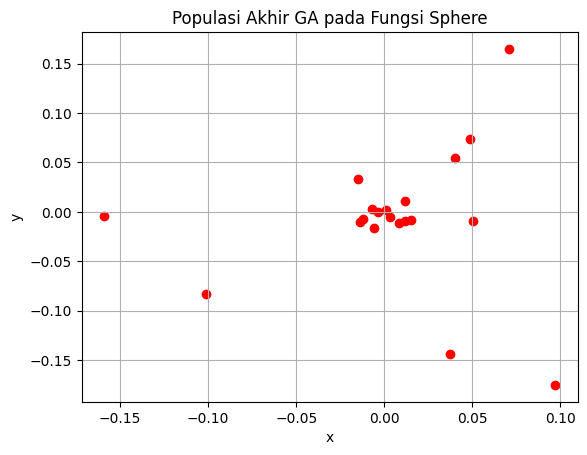

In [2]:
# Import library yang diperlukan
import numpy as np  # Untuk komputasi numerik dan operasi array
import matplotlib.pyplot as plt  # Untuk visualisasi data

# Fungsi fitness untuk mengevaluasi kualitas individu
# Menggunakan fungsi sphere (x² + y²) dengan tanda negatif karena ingin maksimasi
def fitness(ind):
    x, y = ind  # Unpack posisi individu
    return -(x**2 + y**2)  # Nilai negatif karena algoritma ini melakukan maksimasi

# Fungsi mutasi untuk menambahkan variasi genetik
def mutate(ind, mutation_rate=0.1):
    # Menambahkan noise Gaussian dengan standar deviasi mutation_rate
    return ind + mutation_rate * np.random.randn(*ind.shape)

# Inisialisasi populasi awal
np.random.seed(0)  # Menetapkan seed untuk hasil yang reproducible
population = np.random.uniform(-5, 5, (20, 2))  # 20 individu dengan posisi acak di range [-5,5]

# Algoritma Genetika utama (50 generasi)
for generation in range(50):
    # Evaluasi fitness seluruh populasi
    fitness_scores = np.array([fitness(ind) for ind in population])

    # Seleksi: memilih 10 individu terbaik (elitism)
    selected = population[np.argsort(fitness_scores)[-10:]]

    # Inisialisasi list untuk anak-anak
    children = []

    # Membuat 10 anak baru
    for i in range(10):
        # Memilih 2 orang tua secara acak dari yang terseleksi
        parents = selected[np.random.choice(10, 2, replace=False)]

        # Rekombinasi: rata-rata posisi orang tua (crossover)
        child = (parents[0] + parents[1]) / 2

        # Mutasi anak dan tambahkan ke populasi
        children.append(mutate(child))

    # Gabungkan populasi terpilih dengan anak-anak
    population = np.vstack([selected, children])

# Visualisasi hasil akhir
plt.scatter(population[:, 0], population[:, 1], c='red')  # Plot semua individu
plt.title("Populasi Akhir GA pada Fungsi Sphere")  # Judul plot
plt.xlabel("x")  # Label sumbu x
plt.ylabel("y")  # Label sumbu y
plt.grid()  # Menampilkan grid
plt.show()  # Tampilkan plot

# CASE 3: Visualisasi Data Berdimensi Tinggi dengan PCA dan Parallel Coordinates

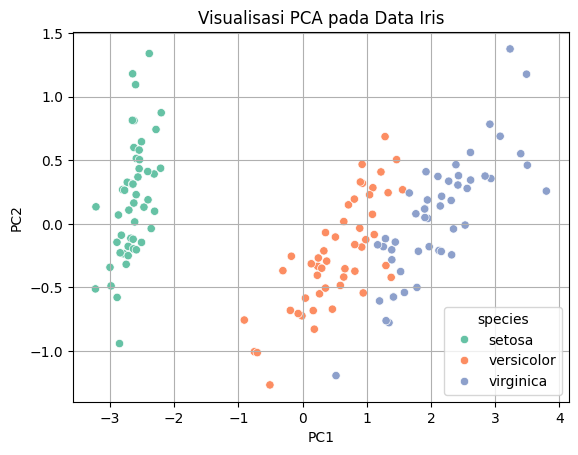

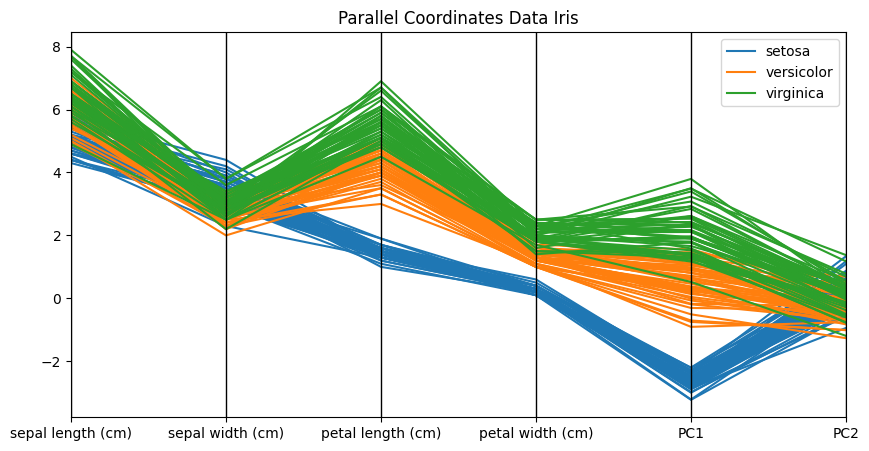

In [3]:
# Import library yang diperlukan
from sklearn.datasets import load_iris  # Untuk memuat dataset Iris
from sklearn.decomposition import PCA  # Untuk analisis PCA
import pandas as pd  # Untuk manipulasi data
import seaborn as sns  # Untuk visualisasi data
import matplotlib.pyplot as plt  # Untuk plotting

# 1. Memuat dan mempersiapkan data
# ---------------------------------
# Memuat dataset Iris dari scikit-learn
iris = load_iris()
X = iris.data  # Fitur-fitur (sepal length, sepal width, petal length, petal width)
y = iris.target  # Label/target (spesies bunga)

# Membuat DataFrame pandas untuk memudahkan analisis
df = pd.DataFrame(X, columns=iris.feature_names)

# Menambahkan kolom spesies sebagai kategori
# pd.Categorical.from_codes mengkonversi kode numerik (0,1,2) menjadi nama spesies
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

# 2. Analisis PCA (Principal Component Analysis)
# ----------------------------------------------
# Membuat model PCA dengan 2 komponen utama
pca = PCA(n_components=2)

# Melakukan transformasi PCA dan menambahkan hasilnya ke DataFrame
# .T untuk transpose hasil sehingga bisa di-unpack ke PC1 dan PC2
df['PC1'], df['PC2'] = pca.fit_transform(X).T

# 3. Visualisasi hasil PCA
# -----------------------
# Membuat scatter plot dari 2 komponen utama dengan warna berdasarkan spesies
sns.scatterplot(data=df, x='PC1', y='PC2', hue='species', palette='Set2')
plt.title("Visualisasi PCA pada Data Iris")  # Judul plot
plt.grid()  # Menampilkan grid
plt.show()  # Menampilkan plot

# 4. Visualisasi Parallel Coordinates
# -----------------------------------
# Import fungsi untuk parallel coordinates plot
from pandas.plotting import parallel_coordinates

# Membuat figure dengan ukuran yang lebih lebar
plt.figure(figsize=(10, 5))

# Membuat parallel coordinates plot
# Setiap garis mewakili satu bunga, warnanya berdasarkan spesies
parallel_coordinates(df, 'species', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Parallel Coordinates Data Iris")  # Judul plot
plt.grid()  # Menampilkan grid
plt.show()  # Menampilkan plot